In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('acled.csv')

In [14]:
df.columns

Index([u'GWNO', u'EVENT_ID_CNTY', u'EVENT_ID_NO_CNTY', u'EVENT_DATE', u'YEAR',
       u'TIME_PRECISION', u'EVENT_TYPE', u'ACTOR1', u'ALLY_ACTOR_1', u'INTER1',
       u'ACTOR2', u'ALLY_ACTOR_2', u'INTER2', u'INTERACTION', u'COUNTRY',
       u'ADMIN1', u'ADMIN2', u'ADMIN3', u'LOCATION', u'LATITUDE', u'LONGITUDE',
       u'GEO_PRECISION', u'SOURCE', u'NOTES', u'FATALITIES'],
      dtype='object')

In [15]:
df_borno = df[df['COUNTRY']=='Nigeria']

In [16]:
df_borno = df_borno[df_borno['ADMIN1']=='Borno']

In [17]:
len(df_borno[df_borno['GEO_PRECISION']==3])

16

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

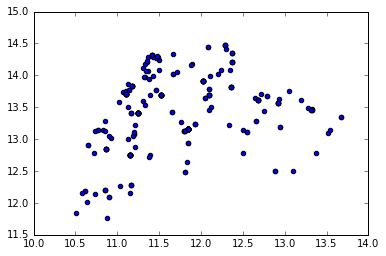

In [19]:
plt.scatter(lat, lon)

In [20]:
lat = df_borno['LATITUDE'].astype(float)

In [21]:
lon = df_borno['LONGITUDE'].astype(float)

In [22]:
import mplleaflet

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(lon, lat)
mplleaflet.display()

In [24]:
import geopandas as gpd

In [25]:
borno_shapes = gpd.read_file('VTS_Geometry/Boundary_VaccWards_Export.shp')

In [27]:
import shapely
import seaborn as sns

In [28]:
df_borno = gpd.GeoDataFrame(df_borno, geometry=df_borno.apply(
        lambda srs: shapely.geometry.Point(float(srs['LONGITUDE']), float(srs['LATITUDE'])), axis='columns'))

In [29]:
import numpy as np

In [30]:
def assign_ward(incidents):
    bools = [geom.contains(incidents['geometry']) for geom in borno_shapes['geometry']]
    if True in bools:
        return borno_shapes.iloc[bools.index(True)]['WardName']
    else:
        return np.nan

In [31]:
df_borno['ward_name'] = df_borno.apply(assign_ward, axis='columns')

In [32]:
borno_shapes['incidents_by_ward'] = borno_shapes['WardName'].map(df_borno['ward_name'].value_counts())

<bound method AxesSubplot.set_axis_off of <matplotlib.axes._subplots.AxesSubplot object at 0x14f204790>>

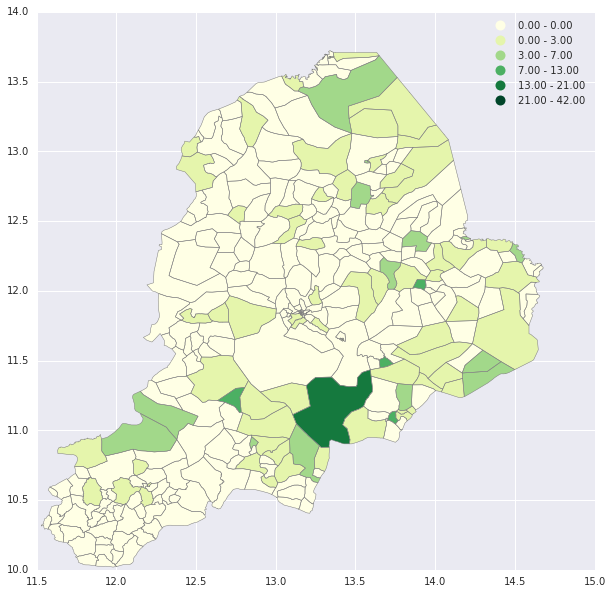

In [82]:
f = plt.figure(figsize=(10, 10))
ax=f.gca()
kw = dict(column='ward_incidents', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
borno_shapes.plot(scheme='Fisher_Jenks', ax=ax, **kw)
#ax2.scatter(lon, lat)
ax.set_axis_off


<bound method AxesSubplot.set_axis_off of <matplotlib.axes._subplots.AxesSubplot object at 0x14dd12d50>>

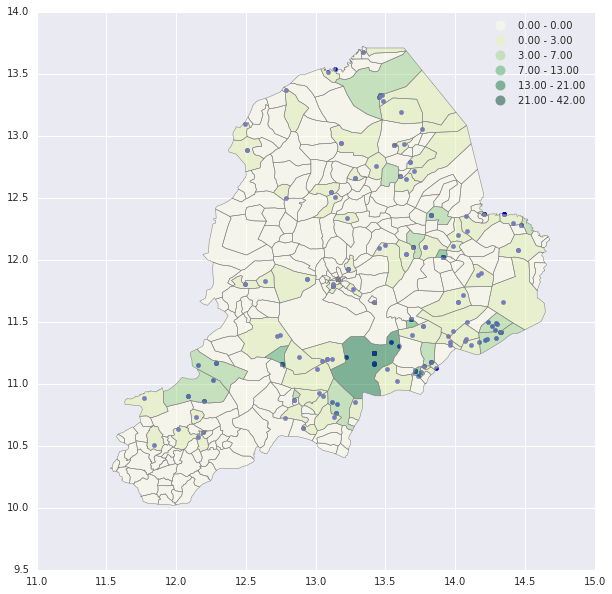

In [81]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax=f.gca()
kw = dict(column='ward_incidents', k=6, cmap='YlGn', alpha=.5, legend=True, edgecolor='gray', linewidth=0.5)
plt.scatter(lon, lat)
borno_shapes.plot(scheme='Fisher_Jenks', ax=ax, **kw)
ax.set_axis_off

In [36]:
borno_shapes['ward_incidents'] = borno_shapes['incidents_by_ward'].fillna(0)